In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/user/Desktop/Portfolio Dataset copy/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Aanalysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


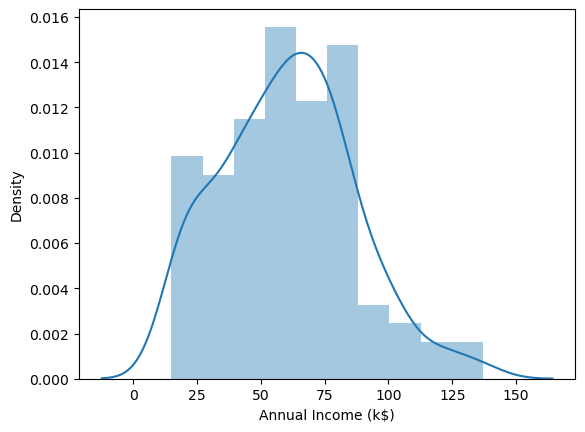

In [5]:
sns.distplot(df['Annual Income (k$)']);

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

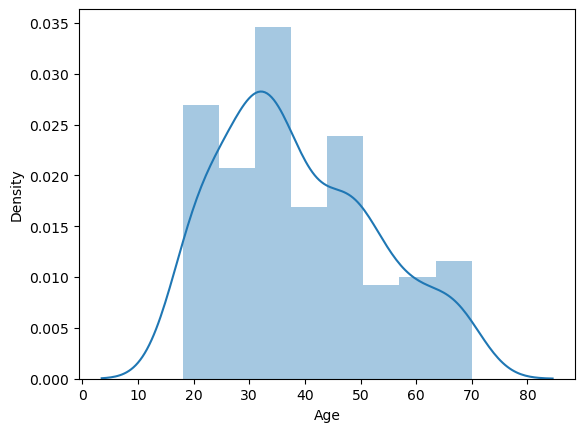

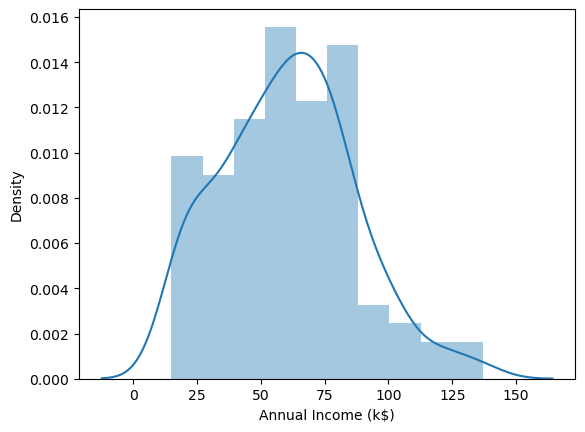

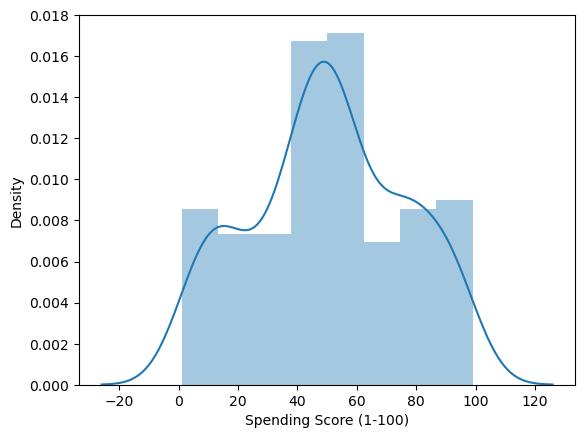

In [7]:
columns =['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

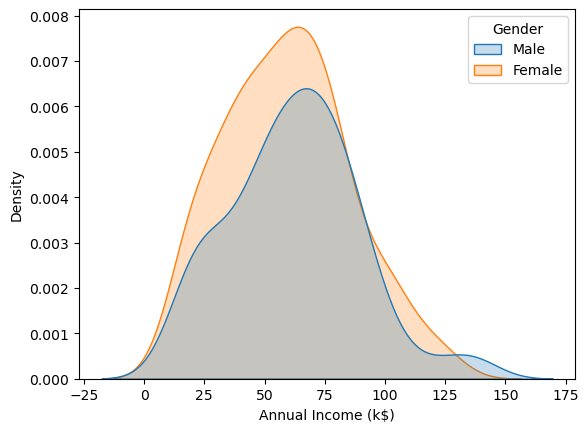

In [8]:
sns.kdeplot(x=df['Annual Income (k$)'],shade=True,hue= df['Gender']);

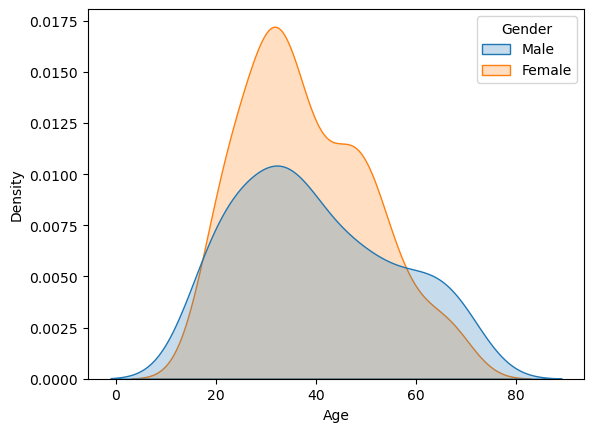

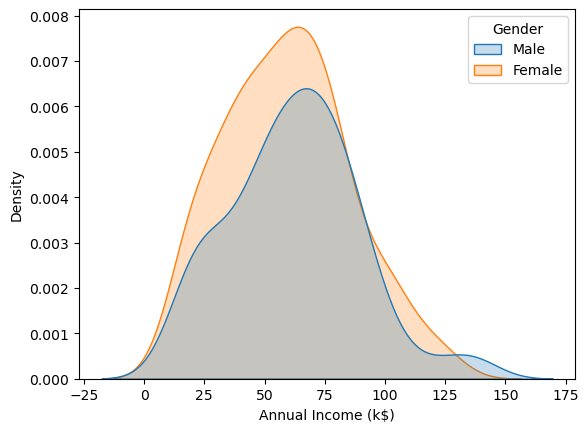

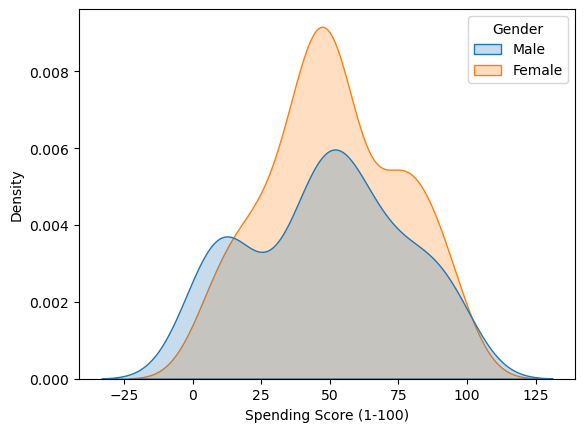

In [9]:
columns =['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(x=df[i],shade=True,hue= df['Gender']);

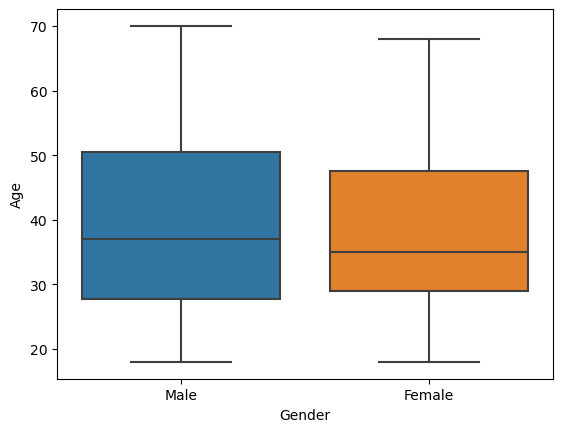

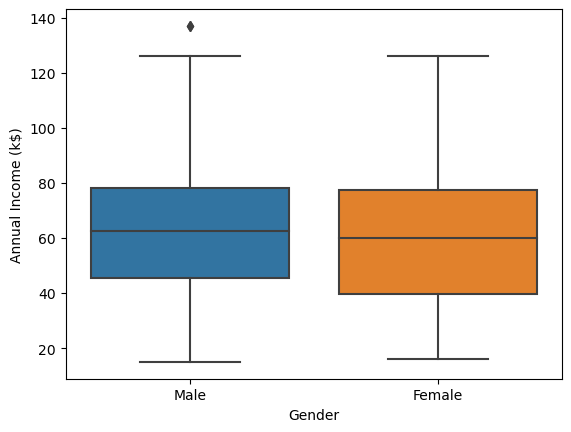

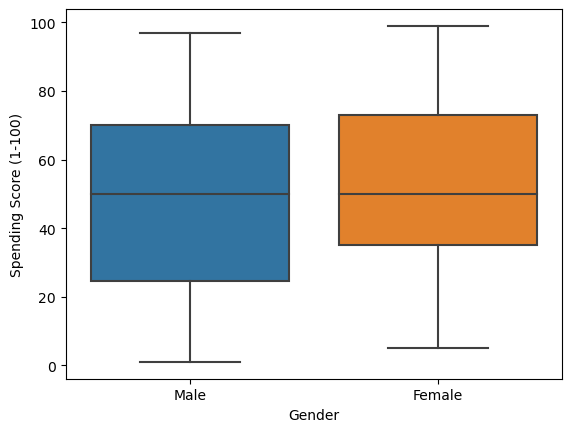

In [10]:
columns =['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i]);

In [11]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [12]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

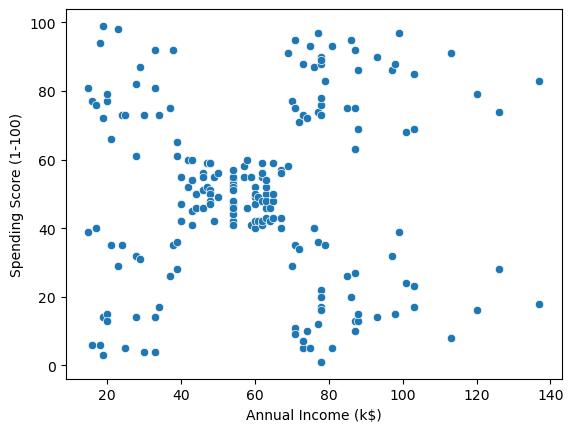

In [13]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)');

In [14]:
#df=df.drop('CustomerID'),axis=1
#sns.pairplot(df)

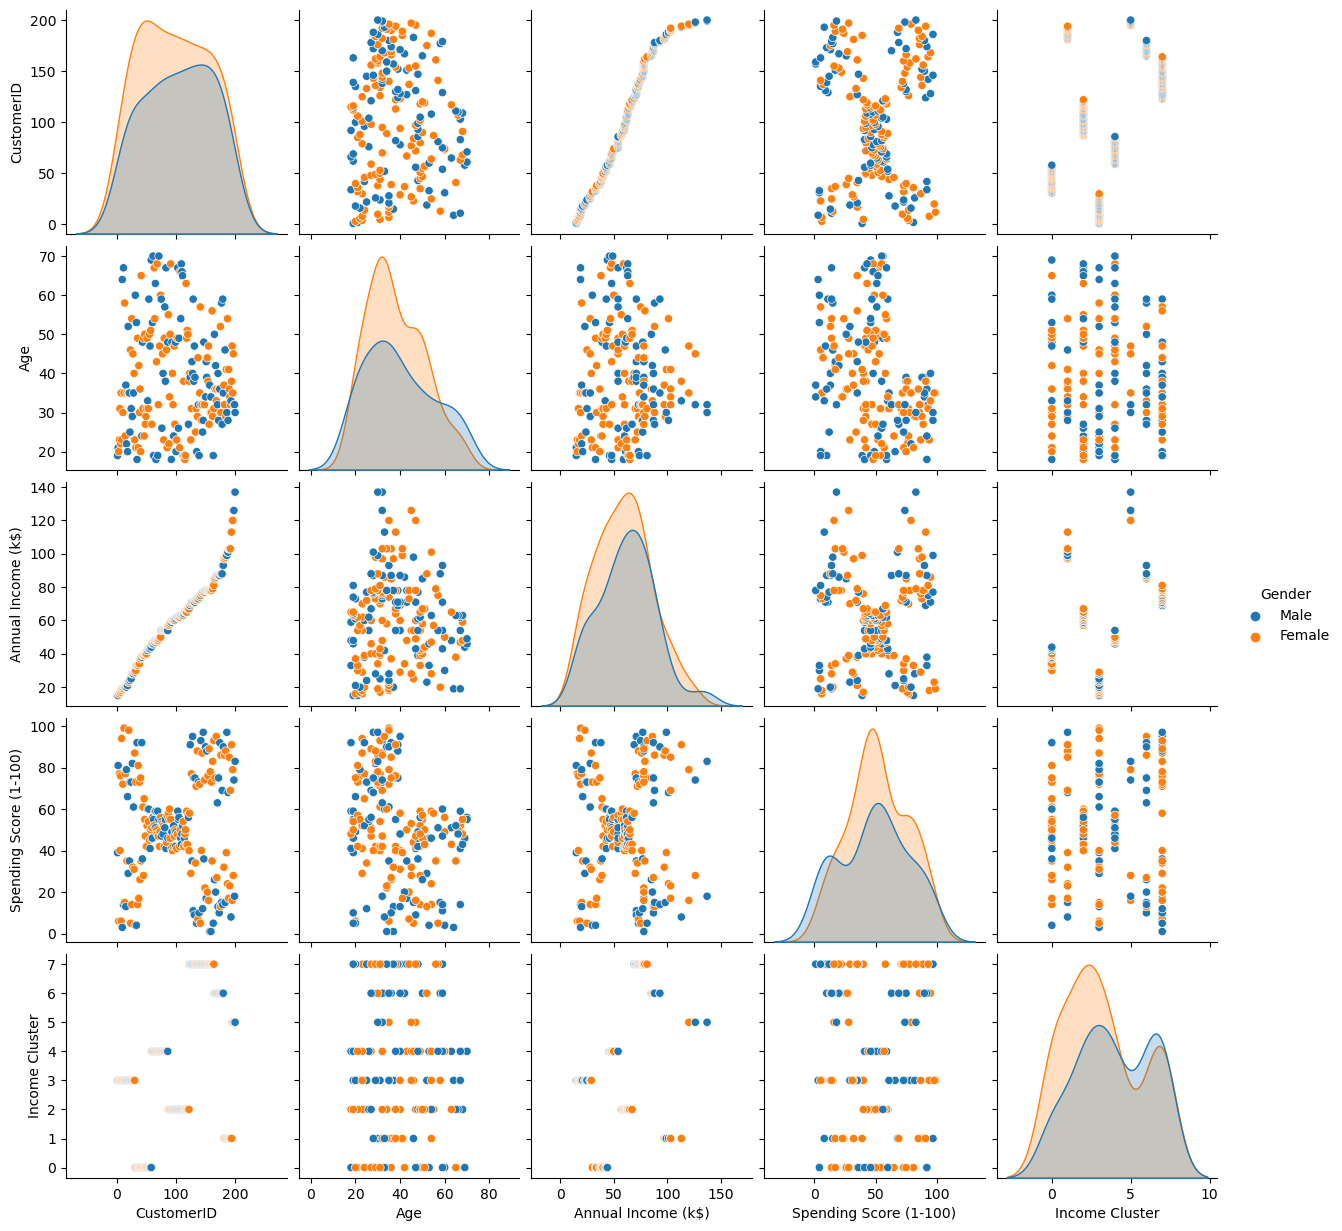

In [31]:
#df=df.drop('CustomerID',axis=1)

sns.pairplot(df,hue='Gender')

In [16]:
df.groupby(['Gender'])['Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

#Shopping mean for female is slightly higher

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [17]:
#find the correlation 
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

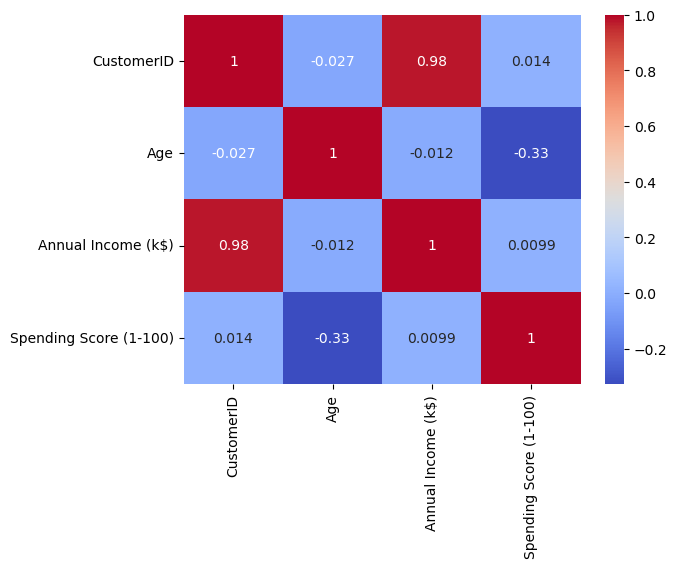

In [18]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Clustering -Univariate, Bivariate, Multivariate

In [60]:
clustering1 = KMeans(n_clusters=3)

In [61]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [62]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [63]:
df['Income Cluster']= clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [64]:
## How many customers fall within each cluster

df['Income Cluster'].value_counts()

1    90
0    74
2    36
Name: Income Cluster, dtype: int64

In [65]:
clustering1.inertia_

23517.33093093093

In [66]:
inertia_scores=[]  # store the cluster scores in an empty list
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [68]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5081.484660267268,
 3949.275613275612,
 2822.4996947496966,
 2189.2563714063717,
 1766.9739538239546]

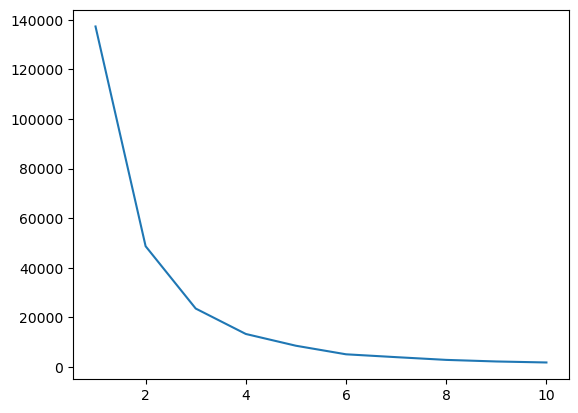

In [59]:
# the elbow method shows how many clusters should we use. The elboe is at 3
plt.plot(range(1,11),inertia_scores);

In [69]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [71]:

#Find the aveage income by cluster

df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,38.722222,67.088889,50.000000
2,37.833333,99.888889,50.638889


In [ ]:
# Bivariate cluster: helps to find the relationship between Annual Income and Spending score

In [106]:
clustering2= KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,2


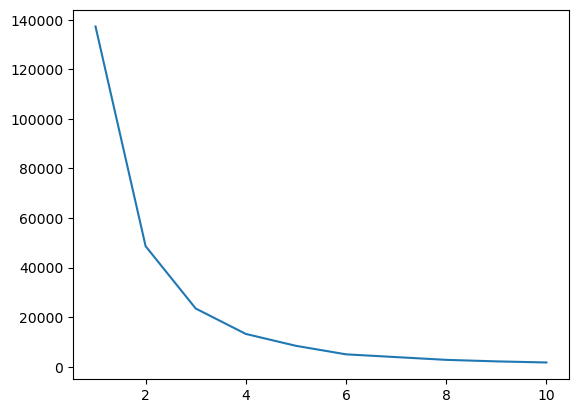

In [107]:
inertia_scores2=[]  # store the cluster scores in an empty list
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2);

In [108]:
# The center in x and y variables to the cluster

centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']


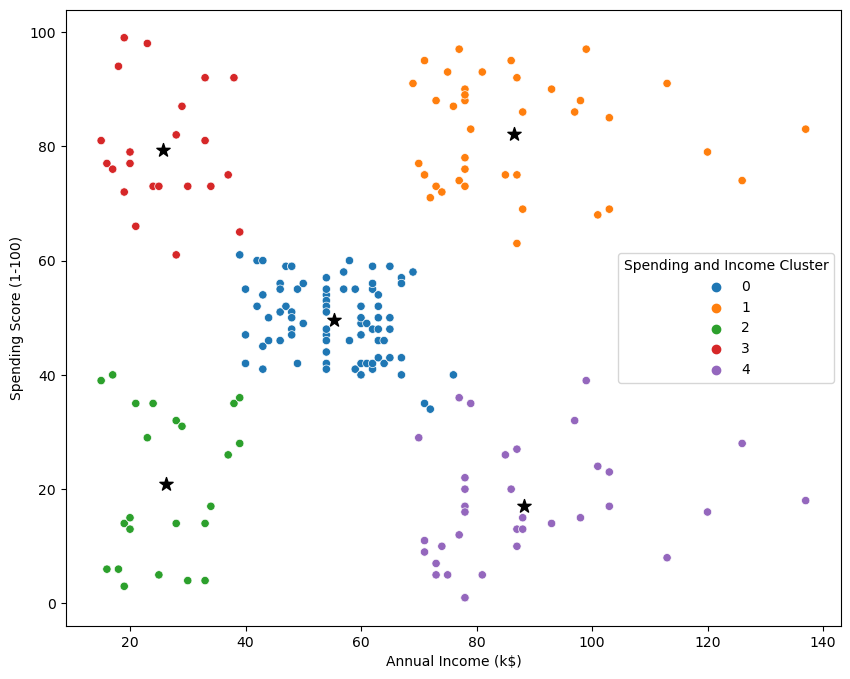

In [140]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster', palette='tab10')
plt.savefig('clustering_bivariate.png')

In [111]:

#Find the percentage of shoppers in each cluster with the highest spending and income 
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize = 'index' )

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.608696,0.391304
3,0.590909,0.409091
4,0.457143,0.542857


 Cluster 2 with females earns over 60 percentage more. Potential target cluster

In [112]:
# Find the high spending income by age

df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,45.217391,26.304348,20.913043
3,25.272727,25.727273,79.363636
4,41.114286,88.200000,17.114286


The highest spending score is in cluster 1  while the highest Annual income is in the cluster 4.
Seacrch through the customer ID to know what the purchases are. The 4th cluster has the highest Annual Income

# Multivariate clustering

In [117]:
from sklearn.preprocessing import StandardScaler

In [119]:
scale = StandardScaler()

In [120]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,2


We need the Gender, Age and Annual Income only from the dataframe

In [122]:
#split the gener into male and female

dff =pd.get_dummies(df)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Female,Gender_Male
0,1,19,15,39,0,2,0,1
1,2,21,15,81,0,3,0,1
2,3,20,16,6,0,2,1,0
3,4,23,16,77,0,3,1,0
4,5,31,17,40,0,2,1,0


In [123]:
dff =pd.get_dummies(df, drop_first=True) # drop one of the gender(female)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,0,2,1
1,2,21,15,81,0,3,1
2,3,20,16,6,0,2,0
3,4,23,16,77,0,3,0
4,5,31,17,40,0,2,0


In [125]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [127]:
#pick the columns you dont need

dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]

dff.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


Now, we dont have the customer ID anymore. Lets scale

In [132]:
dff=scale.fit_transform(dff)

In [134]:
dff =pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


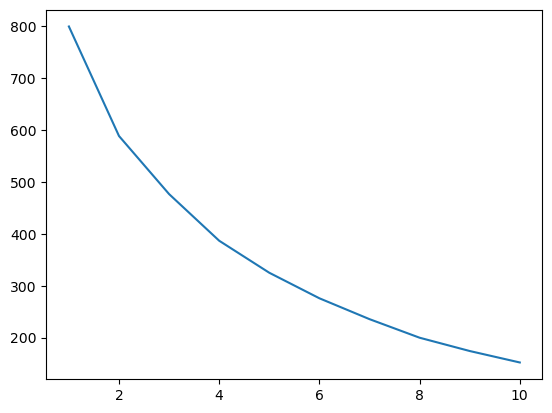

In [136]:
inertia_scores3=[]  # store the cluster scores in an empty list
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3);

In [139]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,2
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,1
196,197,Female,45,126,28,2,4
197,198,Male,32,126,74,2,1
198,199,Male,32,137,18,2,4


In [143]:
df.to_csv('clustering.csv')

# Conclusion


## Target Cluster

* Target group would be cluster 1 which has the higher spending score and second highest income

* Cluster 1 has the highest spending score and 53 percent of these shoppers are women. We should look for ways to attract these customers using a marketing campaign targeting popular items in this cluster

* Cluster 2 presents aninteresting opporturnity to market to the customers for sales event on popular items

